In [1]:
import cv2
import os
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

# Diretórios de entrada e saída
input_dir = Path("../data/frames")
output_dir = Path("../data/preprocessed_frames")
output_dir.mkdir(parents=True, exist_ok=True)

# Configurações
TARGET_SIZE = (224, 224)  # mesma dimensão dos modelos
NORMALIZE = True          # normalizar [0,1]
GRAY = False              # True para converter para cinza


In [2]:
def preprocess_image(image_path, gray=False, normalize=True, size=(224, 224)):
    img = cv2.imread(str(image_path))

    if gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.expand_dims(img, axis=-1)  # manter formato (H, W, 1)

    img = cv2.resize(img, size)

    if normalize:
        img = img.astype("float32") / 255.0

    return img


In [3]:
# Processar todos os frames e guardar
for video_dir in tqdm(list(input_dir.glob("*"))):
    video_id = video_dir.name
    output_video_dir = output_dir / video_id
    output_video_dir.mkdir(parents=True, exist_ok=True)

    for frame_path in video_dir.glob("*.jpg"):
        img = preprocess_image(frame_path, gray=GRAY, normalize=NORMALIZE, size=TARGET_SIZE)

        # Converter de volta para formato gravável
        img_out = (img * 255).astype("uint8")
        if GRAY:
            img_out = img_out.squeeze()  # remover canal extra
        cv2.imwrite(str(output_video_dir / frame_path.name), img_out)


100%|██████████| 30/30 [09:04<00:00, 18.13s/it]


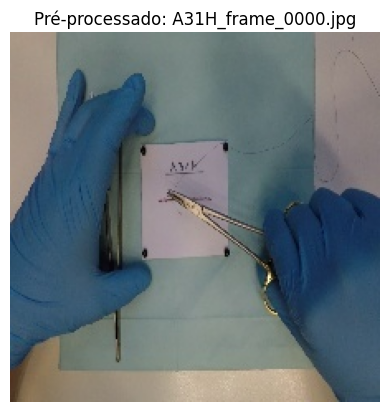

In [4]:
# Visualização de exemplo
sample_video = list(output_dir.glob("*"))[0]
sample_frame = list(sample_video.glob("*.jpg"))[0]

img = cv2.imread(str(sample_frame))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Pré-processado: {sample_frame.name}")
plt.axis("off")
plt.show()
